## Facebook Ads Clustering

## 1. Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

## 2. Importing the dataset and reading it

In [2]:
df=pd.read_csv('/content/KAG_conversion_data.csv')
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


## 3. Data Cleaning

In [3]:
print(df['fb_campaign_id'].unique().shape)
print(df['fb_campaign_id'].shape)

(691,)
(1143,)


In [4]:
campaign_arr=[]
index_campaign=[]
for i in df['fb_campaign_id'].unique():
  campaign_arr.append(i)
print(len(campaign_arr))
j=0
for i in range(len(df['fb_campaign_id'])):
    if(df['fb_campaign_id'][i]==(campaign_arr[j])):
      index_campaign.append(i)
      j+=1
print(len(index_campaign))

691
691


In [5]:
interest_arr=[]
impression_arr=[]
age_arr=[]
for i in index_campaign:
  interest_arr.append(df['interest'][i])
  impression_arr.append(df['Impressions'][i])
  age_arr.append(df['age'][i])
print(len(interest_arr))
print(len(impression_arr))

691
691


## 4. Preparing final dataframe

In [6]:
final_dataset=pd.DataFrame()
final_dataset_cols=['Fb_Campaign_id','Age','Interest','Impressions']
fin_ds=[campaign_arr,age_arr,interest_arr,impression_arr]
for i in range(len(final_dataset_cols)):
  final_dataset[final_dataset_cols[i]]=fin_ds[i]
print(final_dataset)

     Fb_Campaign_id    Age  Interest  Impressions
0            103916  30-34        15         7350
1            103917  30-34        16        17861
2            103920  30-34        20          693
3            103928  30-34        28         4259
4            103929  30-34        29         1915
..              ...    ...       ...          ...
686          179977  45-49       109      1129773
687          179978  45-49       110       637549
688          179979  45-49       111       151531
689          179981  45-49       113       790253
690          179982  45-49       114       513161

[691 rows x 4 columns]


## 5. Data analysis and visualization

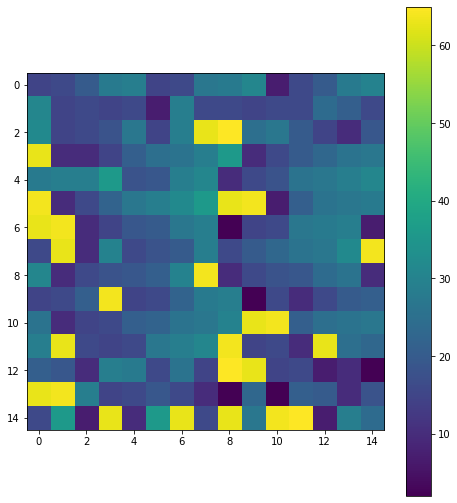

In [7]:
plt.figure(figsize=(8,9))
plt.imshow(np.array(final_dataset['Interest'][0:225]).reshape(15,15), cmap='viridis')
plt.colorbar()
plt.savefig('Plot 1')
plt.show()

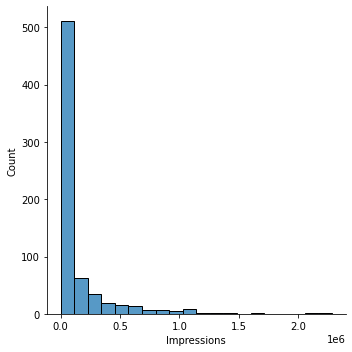

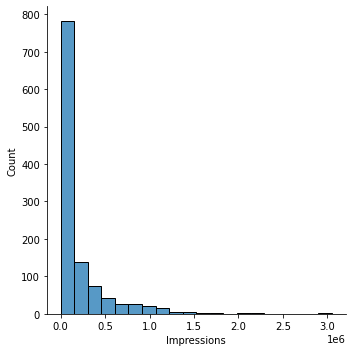

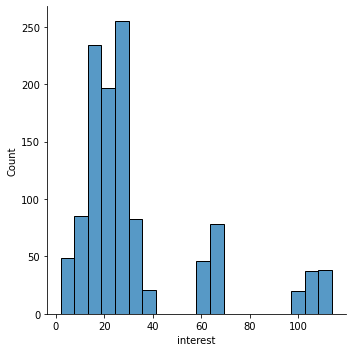

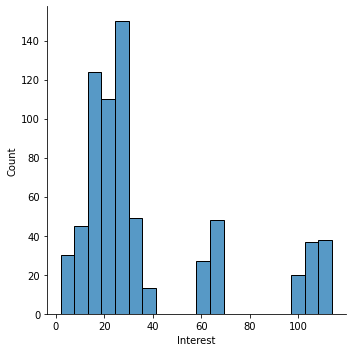

In [8]:
sns.displot(final_dataset['Impressions'],bins=20)
sns.displot(df['Impressions'],bins=20)
sns.displot(df['interest'],bins=20)
sns.displot(final_dataset['Interest'],bins=20)
plt.savefig('Plot 2')
plt.show()

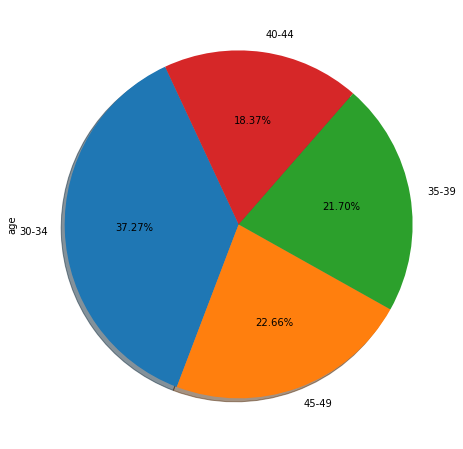

In [9]:
plt.figure(figsize=(8,8))
df['age'].value_counts().plot(kind='pie',autopct='%.2f%%',shadow=True,startangle=115)
plt.savefig('Plot 3')
plt.show()

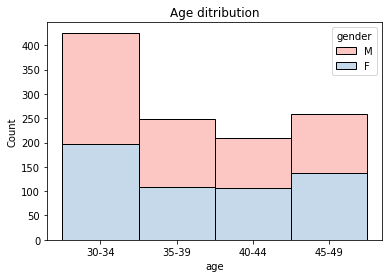

In [32]:
sns.histplot(data=df, x='age', hue='gender', binwidth=9, multiple='stack',palette='Pastel1').set_title('Age ditribution') 
plt.savefig('Plot 4')
plt.show()

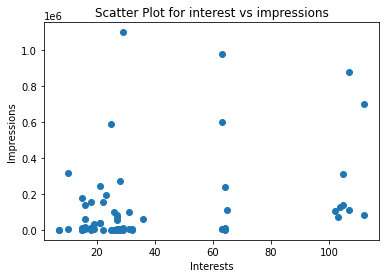

In [33]:
plt.scatter(final_dataset['Interest'][0:690:10],final_dataset['Impressions'][0:690:10])
plt.title('Scatter Plot for interest vs impressions')
plt.xlabel('Interests')
plt.ylabel('Impressions')
plt.savefig('Plot 4')
plt.show()

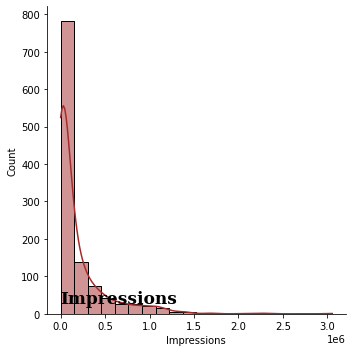

In [34]:
sns.displot(x="Impressions", data=df, kde=True, bins=20, color='brown')  
plt.text(0, 28, 'Impressions', fontfamily='serif', fontsize=17, fontweight='bold')
plt.savefig('Plot 5')
plt.show()

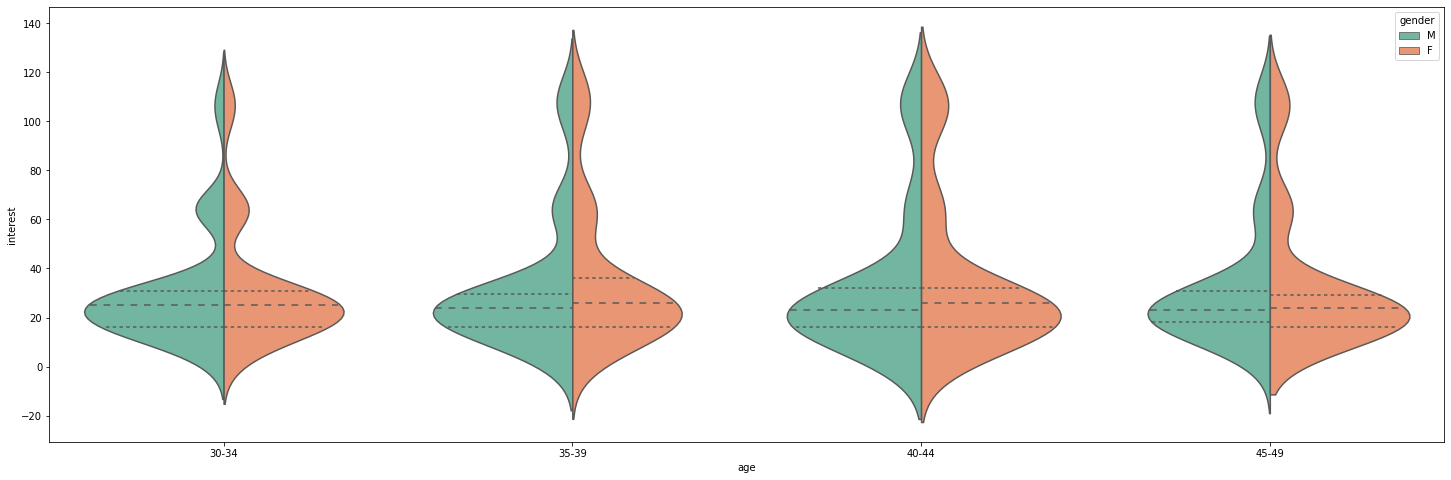

In [35]:
plt.figure(figsize=(25,8))
ax = sns.violinplot(x="age", y="interest", hue="gender",data=df, palette="Set2", split=True,scale="count", inner="quartile")
plt.savefig('Plot 6')
plt.show()

## 6. KMeans Clustering with the dataset

In [36]:
print(final_dataset['Interest'][0:690:10].shape)

(69,)


In [37]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [38]:
ds_inter_impr=pd.DataFrame()
ds_inter_impr['Fb_Campaign_id']=final_dataset['Fb_Campaign_id'][0:690:10]
ds_inter_impr['Age']=final_dataset['Age'][0:690:10]
ds_inter_impr['Interest']=final_dataset['Interest'][0:690:10]
ds_inter_impr['Impressions']=final_dataset['Impressions'][0:690:10]
y_pred=km.fit_predict(ds_inter_impr[['Interest','Impressions']])
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2, 2, 2, 2, 1,
       0, 1, 0], dtype=int32)

In [39]:
ds_inter_impr['Clusters']=y_pred
ds_inter_impr

,Fb_Campaign_id,Age,Interest,Impressions,Clusters
0,103916,30-34,15,7350,0
10,103962,30-34,7,735,0
20,104034,35-39,7,559,0
30,104220,30-34,32,3091,0
40,104287,35-39,27,5864,0
...,...,...,...,...,...
640,179925,30-34,102,104496,2
650,179935,30-34,112,699232,1
660,179950,35-39,112,81569,0
670,179960,40-44,107,877535,1


## 7. Plotting the unbaised cluster

In [40]:
df0=ds_inter_impr[ds_inter_impr.Clusters==0]
df1=ds_inter_impr[ds_inter_impr.Clusters==1]
df2=ds_inter_impr[ds_inter_impr.Clusters==2]

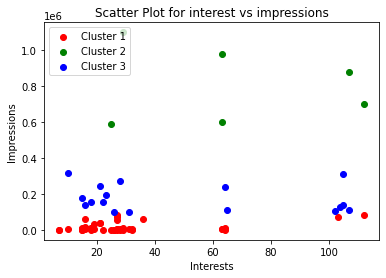

In [41]:
plt.scatter(df0['Interest'],df0['Impressions'],color='red')
plt.scatter(df1['Interest'],df1['Impressions'],color='green')
plt.scatter(df2['Interest'],df2['Impressions'],color='blue')
plt.title('Scatter Plot for interest vs impressions')
plt.xlabel('Interests')
plt.ylabel('Impressions')
plt.legend(labels=('Cluster 1','Cluster 2','Cluster 3'),loc='upper left')
plt.savefig('Plot 7')
plt.show()

## 8. Scaling Data using MinMax

In [42]:
scaler=MinMaxScaler()
scaler.fit(ds_inter_impr[['Impressions']])
ds_inter_impr['Impressions']=scaler.transform(ds_inter_impr[['Impressions']])
scaler.fit(ds_inter_impr[['Interest']])
ds_inter_impr['Interest']=scaler.transform(ds_inter_impr[['Interest']])

In [43]:
ds_inter_impr

,Fb_Campaign_id,Age,Interest,Impressions,Clusters
0,103916,30-34,0.076190,0.006287,0
10,103962,30-34,0.000000,0.000260,0
20,104034,35-39,0.000000,0.000099,0
30,104220,30-34,0.238095,0.002406,0
40,104287,35-39,0.190476,0.004933,0
...,...,...,...,...,...
640,179925,30-34,0.904762,0.094801,2
650,179935,30-34,1.000000,0.636694,1
660,179950,35-39,1.000000,0.073911,0
670,179960,40-44,0.952381,0.799155,1


## 9. Preparing final KMeans cluster for biasing the data

In [44]:
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(ds_inter_impr[['Interest','Impressions']])
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 2, 0, 2, 1, 1, 1, 1, 1, 2,
       1, 2, 1], dtype=int32)

In [45]:
ds_inter_impr['Clusters']=y_pred
ds_inter_impr

,Fb_Campaign_id,Age,Interest,Impressions,Clusters
0,103916,30-34,0.076190,0.006287,0
10,103962,30-34,0.000000,0.000260,0
20,104034,35-39,0.000000,0.000099,0
30,104220,30-34,0.238095,0.002406,0
40,104287,35-39,0.190476,0.004933,0
...,...,...,...,...,...
640,179925,30-34,0.904762,0.094801,1
650,179935,30-34,1.000000,0.636694,2
660,179950,35-39,1.000000,0.073911,1
670,179960,40-44,0.952381,0.799155,2


In [46]:
ds_inter_impr['Clusters'].unique()

array([0, 1, 2], dtype=int32)

In [47]:
km.cluster_centers_

array([[0.13580952, 0.04465201],
       [0.75457875, 0.09233256],
       [0.56666667, 0.73406082]])

In [48]:
df0=ds_inter_impr[ds_inter_impr.Clusters==0]
df1=ds_inter_impr[ds_inter_impr.Clusters==1]
df2=ds_inter_impr[ds_inter_impr.Clusters==2]

## 10. Scatter plot with located centroids

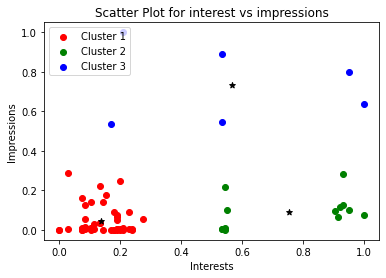

In [49]:
plt.scatter(df0['Interest'],df0['Impressions'],color='red')
plt.scatter(df1['Interest'],df1['Impressions'],color='green')
plt.scatter(df2['Interest'],df2['Impressions'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='*',color='black',label='centroid')
plt.title('Scatter Plot for interest vs impressions')
plt.xlabel('Interests')
plt.ylabel('Impressions')
plt.legend(labels=('Cluster 1','Cluster 2','Cluster 3'),loc='upper left')
plt.savefig('Plot 8')
plt.show()

## 11. Finding and plotting Sum of squared error

In [50]:
sse=[]
for i in range(1,10):
  km1=KMeans(n_clusters=i)
  km1.fit(ds_inter_impr[['Interest','Impressions']])
  sse.append(km1.inertia_)
print(sse)

[8.872065172753558, 3.5873549631465695, 1.8648293771659974, 1.3414653519127484, 0.8397963087125083, 0.6386381090910626, 0.4747171230552123, 0.3270380378214336, 0.2615183498490762]


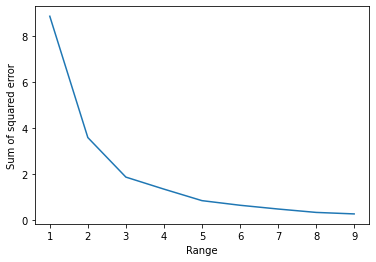

In [51]:
plt.xlabel('Range')
plt.ylabel('Sum of squared error')
plt.plot(range(1,10),sse)
plt.savefig('Plot 9')
plt.show()

## 12. Final prediction and output

In [52]:
pred_cluster=int(km.predict([[0.138762,0.8201]]))
x_int=[i for i in ds_inter_impr['Interest'] if i<0.14 and i>0.13][0]
x_imp=[j for j in ds_inter_impr['Impressions'] if j<0.80 and j>0.7][0]
act_cluster=int(km.predict([[x_int,x_imp]]))
print(x_int,x_imp)
print("Actual cluster: ",act_cluster)
print("Predicted cluster: ",pred_cluster)
print("Thus the cluster belongs to::-> ")
ser_int=[j for j in ds_inter_impr['Interest']]
print(ser_int[67])
x1_int=ser_int.index(x_int)
ser_imp=[k for k in ds_inter_impr['Impressions']]
x1_imp=ser_imp.index(x_imp)
print(x1_int,x1_imp)
# print(ds_inter_impr['Impressions'])
print('Thus in this Fb Campaign the 18th predicted value of interest and the 67th predicted value of impressions in the dataset is with respect to Cluster 1 or Group 2\n\n')
print('Result: ')
print('1. Fb_Campaign_id :',ds_inter_impr['Fb_Campaign_id'][180],
      '\t2. Age :',ds_inter_impr['Age'][180],
      '\t3. Interest :',df['interest'][180],
      '\t4. Impressions :',df['Impressions'][180])
print('1. Fb_Campaign_id :',ds_inter_impr['Fb_Campaign_id'][670],
      '\t2. Age :',ds_inter_impr['Age'][670],
      '\t3. Interest :',df['interest'][670],
      '\t4. Impressions :',df['Impressions'][670])
print('\n\n\n')

0.13333333333333333 0.7991546364699922
Actual cluster:  2
Predicted cluster:  2
Thus the cluster belongs to::-> 
0.9523809523809526
18 67
Thus in this Fb Campaign the 18th predicted value of interest and the 67th predicted value of impressions in the dataset is with respect to Cluster 1 or Group 2


Result: 
1. Fb_Campaign_id : 115498 	2. Age : 45-49 	3. Interest : 27 	4. Impressions : 1955
1. Fb_Campaign_id : 179960 	2. Age : 40-44 	3. Interest : 29 	4. Impressions : 59390




